In [1]:
import numpy as np
import pandas as pd
import pickle
import time

import time
from KNN_Shapley import get_VN, get_true_KNN, compute_KNN_shapley, compute_KNN_Asymmetric_Shapley, KNN_LOO
from performance_plot import removing_sequential_data, adding_sequential_data, final_plot

In [2]:
# Load data
m1, m2, m3, m4, m5 = 'jul', 'aug', 'sep', 'oct', 'nov'

with open("data/traffic/traffic_volume.pickle", "rb") as fp:  # Pickling
    mydict = pickle.load(fp)

X_m1_trn = mydict['X_{}_trn'.format(m1)]
y_m1_trn = mydict['y_{}_trn'.format(m1)]
X_m2_trn = mydict['X_{}_trn'.format(m2)]
y_m2_trn = mydict['y_{}_trn'.format(m2)]
X_m3_trn = mydict['X_{}_trn'.format(m3)]
y_m3_trn = mydict['y_{}_trn'.format(m3)]

X_m1m2_trn = mydict['X_{}_{}_trn'.format(m1, m2)]
y_m1m2_trn = mydict['y_{}_{}_trn'.format(m1, m2)]
X_m1m2_val = mydict['X_{}_{}_val'.format(m1, m2)]
y_m1m2_val = mydict['y_{}_{}_val'.format(m1, m2)]

X_m1m2m3_trn = mydict['X_{}_{}_{}_trn'.format(m1, m2, m3)]
y_m1m2m3_trn = mydict['y_{}_{}_{}_trn'.format(m1, m2, m3)]
X_m1m2m3_val = mydict['X_{}_{}_{}_val'.format(m1, m2, m3)]
y_m1m2m3_val = mydict['y_{}_{}_{}_val'.format(m1, m2, m3)]

s_class_dic = {0: np.asarray(range(len(X_m1_trn))), 
               1: np.asarray(range(len(X_m1_trn), len(X_m1m2_trn)))}
K = 3

## Part. 3 Sequential Data Contributors

We assume multiple data contributors contribute data sequentially in a data stream. Show how SV / ASV allocates values to data contributors.

3.1 Train model with $D_t$. Compute SV and ASV.

3.2 Train model with $D_t\cup D_{t+1}$. Compute SV and ASV.

3.3 Train model with $D_t\cup D_{t+1}\cup D_{t+2}$. Compute SV and ASV.

3.3 Plot histograms for SV.

3.4 Plot histograms for ASV.

### 3.1

In [3]:
directory = 'experiments/fair allocation in data market/traffic/'
X_train_1 = X_m1_trn
y_train_1 = y_m1_trn
X_val = X_m1m2m3_val
y_val = y_m1m2m3_val

# Train knn classifier
X_train_knn_gt_1 = get_true_KNN(X_train_1, X_val) 

100%|████████████████████████████████████████| 564/564 [00:00<00:00, 914.73it/s]


In [4]:
# Compute SV
start = time.time()
knn_shaps = compute_KNN_shapley(y_train_1, X_train_knn_gt_1, y_val, K)
end = time.time()
print("Time to compute the exact symmetric shapley values for all data:", end - start)
np.save(directory + 'm1_sv_K={}'.format(K), knn_shaps)

100%|████████████████████████████████████████| 564/564 [00:00<00:00, 808.52it/s]

Time to compute the exact symmetric shapley values for all data: 0.6992876529693604


In [5]:
# Compute ASV
s_class_dic = {0:np.asarray(range(len(X_train_1)))}

start = time.time()
knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_train_1, X_train_knn_gt_1, 
                                                y_val, K, s_class_dic)
end = time.time()
print("Time to compute the exact asymmetric shapley values for all data:", end - start)
np.save(directory + 'm1_asv_K={}'.format(K), knn_asym_shaps)

100%|████████████████████████████████████████| 564/564 [00:02<00:00, 233.23it/s]

Time to compute the exact asymmetric shapley values for all data: 2.419963836669922


### 3.2

In [6]:
directory = 'experiments/fair allocation in data market/traffic/'
X_train_2 = X_m1m2_trn
y_train_2 = y_m1m2_trn
X_val = X_m1m2m3_val
y_val = y_m1m2m3_val

# Train knn classifier
X_train_knn_gt_2 = get_true_KNN(X_train_2, X_val)

100%|████████████████████████████████████████| 564/564 [00:01<00:00, 484.53it/s]


In [31]:
X_train_knn_gt_2.shape, y_train_2.shape # Sanity check

((564, 978), (978,))

In [32]:
# Compute SV
start = time.time()
knn_shaps = compute_KNN_shapley(y_train_2, X_train_knn_gt_2, y_val, K)
end = time.time()
print("Time to compute the exact symmetric shapley values for all data:", end - start)
np.save(directory + 'm1m2_sv_K={}'.format(K), knn_shaps)

100%|████████████████████████████████████████| 564/564 [00:01<00:00, 430.04it/s]

Time to compute the exact symmetric shapley values for all data: 1.316659927368164


In [33]:
# Compute ASV
s_class_dic = {0:np.asarray(range(len(X_train_1))), 
               1:np.asarray(range(len(X_train_1), len(X_train_2)))}

start = time.time()
knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_train_2, 
                                                X_train_knn_gt_2, 
                                                y_val, K, 
                                                s_class_dic)
end = time.time()
print("Time to compute the exact asymmetric shapley values for all data:", end - start)
np.save(directory + 'm1m2_asv_K={}'.format(K), knn_asym_shaps)

100%|█████████████████████████████████████████| 564/564 [00:08<00:00, 64.00it/s]

Time to compute the exact asymmetric shapley values for all data: 12.149849891662598


### 3.3

In [34]:
directory = 'experiments/fair allocation in data market/traffic/'
X_train_3 = X_m1m2m3_trn
y_train_3 = y_m1m2m3_trn
X_val = X_m1m2m3_val
y_val = y_m1m2m3_val

# Train knn classifier
X_train_knn_gt_3 = get_true_KNN(X_train_3, X_val)

100%|████████████████████████████████████████| 564/564 [00:01<00:00, 364.68it/s]


In [35]:
X_train_knn_gt_3.shape, y_train_3.shape # Sanity check

((564, 1312), (1312,))

In [36]:
# Compute SV
start = time.time()
knn_shaps = compute_KNN_shapley(y_train_3, X_train_knn_gt_3, y_val, K)
end = time.time()
print("Time to compute the exact symmetric shapley values for all data:", end - start)
np.save(directory + 'm1m2m3_sv_K={}'.format(K), knn_shaps)

100%|████████████████████████████████████████| 564/564 [00:01<00:00, 320.77it/s]

Time to compute the exact symmetric shapley values for all data: 1.7622368335723877


In [37]:
# Compute ASV
s_class_dic = {0:np.asarray(range(len(X_train_1))), 
               1:np.asarray(range(len(X_train_1), len(X_train_2))),
               2:np.asarray(range(len(X_train_2), len(X_train_3)))}

start = time.time()
knn_asym_shaps = compute_KNN_Asymmetric_Shapley(y_train_3, 
                                                X_train_knn_gt_3, 
                                                y_val, K, 
                                                s_class_dic)
end = time.time()
print("Time to compute the exact asymmetric shapley values for all data:", end - start)
np.save(directory + 'm1m2m3_asv_K={}'.format(K), knn_asym_shaps)

100%|█████████████████████████████████████████| 564/564 [00:12<00:00, 44.56it/s]

Time to compute the exact asymmetric shapley values for all data: 28.255478143692017


### 3.4

In [38]:
# Load SV and ASV
m1_sv = np.load(directory + 'm1_sv_K={}.npy'.format(K))
m1_asv = np.load(directory + 'm1_asv_K={}.npy'.format(K))
m1m2_sv = np.load(directory + 'm1m2_sv_K={}.npy'.format(K))
m1m2_asv = np.load(directory + 'm1m2_asv_K={}.npy'.format(K))
m1m2m3_sv = np.load(directory + 'm1m2m3_sv_K={}.npy'.format(K))
m1m2m3_asv = np.load(directory + 'm1m2m3_asv_K={}.npy'.format(K))

In [39]:
len(m1_sv), len(m1m2_sv), len(m1m2m3_sv)

(523, 978, 1312)

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

fig_directory = 'experiments/fair allocation in data market/traffic/figures/'

In [41]:
# Sanity check

all(m1_sv == m1_asv), sum(m1_sv), sum(m1_asv)

(True, 0.8108747044917258, 0.8108747044917258)

In [13]:
# Sanity check

sum(m1m2_sv), sum(m1m2_asv)

(0.8396825396825399, 0.8396825396825398)

In [14]:
m1m2_asv[:10]

array([0.00150913, 0.0027371 , 0.00193639, 0.00359214, 0.00233001,
       0.00239239, 0.00198447, 0.00171606, 0.00172145, 0.00135127])

In [15]:
m1_sv[:10]

array([0.00150916, 0.00273697, 0.00193639, 0.00359453, 0.00233023,
       0.00241783, 0.0019845 , 0.00171606, 0.00172156, 0.00135153])

In [16]:
g = [i for i in range(len(m1_sv))]

# Rank sv from high to low
m1_sv_idx = np.argsort(m1_sv)[::-1] 
m1_high_sv = m1_sv[m1_sv_idx]

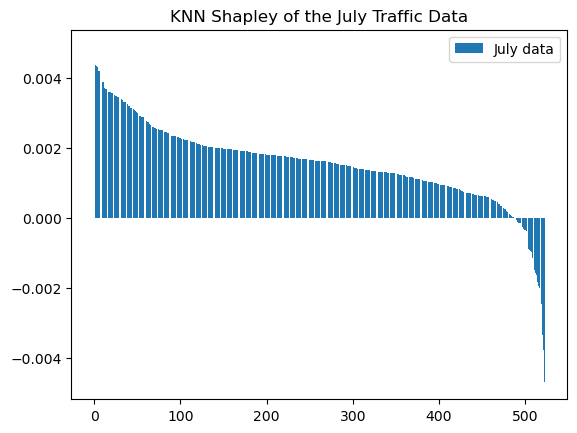

In [17]:
plt.bar(g, m1_high_sv, label='July data')
plt.title('KNN Shapley of the July Traffic Data')
plt.legend()
plt.show()

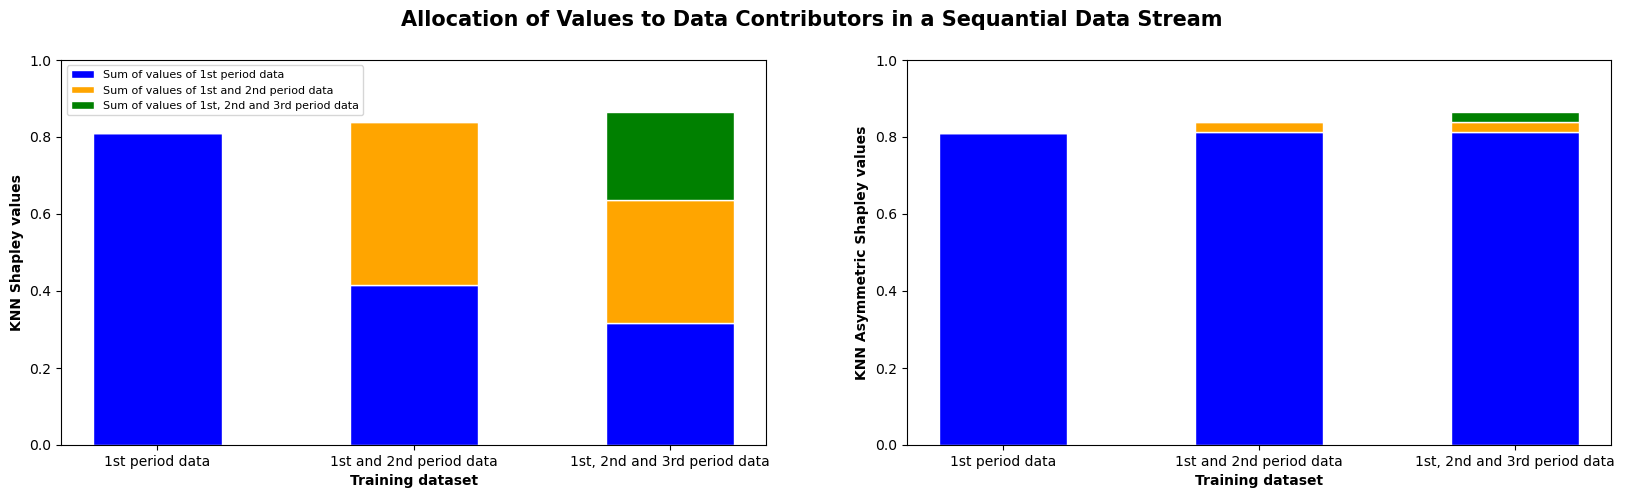

In [51]:
# Define the canvas
fig, axs = plt.subplots(1, 2, figsize=(20, 5))

categories = ['1st period data', '1st and 2nd period data', '1st, 2nd and 3rd period data']
bar_width = 0.5

# Heights of the bars in the first plot
m1_svs = [sum(m1_sv), sum(m1m2_sv[:len(X_train_1)]), 
          sum(m1m2m3_sv[:len(X_train_1)])]
m2_svs = [0, sum(m1m2_sv[len(X_train_1):]), sum(m1m2m3_sv[len(X_train_1):len(X_train_2)])]
m3_svs = [0, 0, sum(m1m2m3_sv[len(X_train_2):len(X_train_3)])]

# Positions of the bars on the x-axis
r = np.arange(len(categories))

# Create the stacked bar plot for the first subplot
axs[0].bar(r, m1_svs, color='b', edgecolor='white', width=bar_width, 
           label='Sum of values of 1st period data')
axs[0].bar(r, m2_svs, bottom=m1_svs, color='orange', edgecolor='white', width=bar_width, 
        label='Sum of values of 1st and 2nd period data')
axs[0].bar(r, m3_svs, bottom=[i+j for i,j in zip(m1_svs, m2_svs)], 
        color='g', edgecolor='white', width=bar_width, 
           label='Sum of values of 1st, 2nd and 3rd period data')

                    
# Add labels, and legend for the first subplot
axs[0].set_xlabel('Training dataset', fontweight='bold')
axs[0].set_ylabel('KNN Shapley values', fontweight='bold')
axs[0].set_ylim((0, 1))
axs[0].set_xticks(r, categories)
axs[0].legend(loc='upper left', fontsize=8)

# Heights of the bars in the second plot
m1_asvs = [sum(m1_asv), sum(m1m2_asv[:len(X_train_1)]), 
           sum(m1m2m3_asv[:len(X_train_1)])]
m2_asvs = [0, sum(m1m2_asv[len(X_train_1):]), 
           sum(m1m2m3_asv[len(X_train_1):len(X_train_2)])]
m3_asvs = [0, 0, sum(m1m2m3_asv[len(X_train_2):len(X_train_3)])]

# Create the stacked bar plot for the second subplot
axs[1].bar(r, m1_asvs, color='b', edgecolor='white', width=bar_width, 
           label='Sum of values of 1st period data')
axs[1].bar(r, m2_asvs, bottom=m1_asvs, color='orange', edgecolor='white', width=bar_width, 
        label='Sum of values of 1st and 2nd period data')
axs[1].bar(r, m3_asvs, bottom=[i+j for i,j in zip(m1_asvs, m2_asvs)], 
        color='g', edgecolor='white', width=bar_width, 
           label='Sum of values of 1st, 2nd and 3rd period data')
                     
# Add labels, and legend for the first subplot
axs[1].set_xlabel('Training dataset', fontweight='bold')
axs[1].set_ylabel('KNN Asymmetric Shapley values', fontweight='bold')
axs[1].set_ylim((0, 1))
axs[1].set_xticks(r, categories)

# Add a single overarching title for the entire figure
fig.suptitle('Allocation of Values to Data Contributors in a Sequantial Data Stream', 
             fontweight='bold', fontsize = 15)

# Save figure
plt.savefig(fig_directory + 'barplot_sequential_data.png')

# Display the plot
plt.show()